In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\User\Downloads/wine.csv')

In [3]:
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.shape

(178, 14)

In [5]:
X=df.drop('Alcohol',axis=1)
y=df['Alcohol']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.70,random_state=10)

In [7]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((53, 13), (53,), (125, 13), (125,))

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)

In [10]:
X_train_sc

array([[-1.19330642,  1.13185385, -0.55722008, -1.13342765,  0.19942923,
         1.46004765,  1.09480117, -0.88573763,  1.208194  , -0.13321081,
         0.16905356,  1.41205482,  0.8294566 ],
       [-1.19330642, -0.60743527,  0.91292719,  0.01188532,  1.14706192,
         0.95206608,  1.33109059,  0.1963071 ,  0.27353212,  0.52372919,
         0.52118695, -0.07889658,  1.01579361],
       [-1.19330642, -0.68492835, -0.38426158, -0.90436506, -0.31083452,
        -0.31788784,  0.33456566, -0.96897184, -0.02476422, -0.09456728,
         0.67769068,  0.34953773,  1.44580208],
       [ 1.44191193, -0.51272151,  1.2588442 ,  1.44352655, -0.09215006,
         0.6980753 , -0.81606107,  1.27835183,  2.22240158,  2.99691508,
        -1.66986526, -1.1242763 , -0.33156628],
       [ 0.12430275, -0.65909732,  1.12912532,  1.44352655, -0.96688792,
         0.95206608,  0.77632413, -1.38514289,  0.57182847, -0.72059246,
         1.42108339,  0.93220839, -1.04824708],
       [ 0.12430275,  0.994088

In [12]:
X_test_sc=sc.fit_transform(X_test)


In [14]:
X_test_sc

array([[ 0.06167567, -1.07314486, -2.07996488, ...,  1.59302376,
         0.60981529, -0.05617793],
       [ 0.06167567, -0.58791522, -1.62822164, ..., -0.00360651,
        -0.22507612, -1.07569828],
       [-1.22323415, -0.67031271, -0.23824244, ...,  0.7007892 ,
         1.45795896,  0.1524368 ],
       ...,
       [-1.22323415, -0.42312025,  1.56873053, ...,  1.45214462,
         1.04713937,  0.60667854],
       [ 0.06167567, -0.4414308 , -1.48922372, ...,  1.35822519,
        -0.62264347, -1.03195648],
       [-1.22323415, -0.19423834,  0.90849041, ...,  0.55991006,
         1.28567978,  1.88528492]])

In [15]:
X.describe()

,Wine,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [30]:
X_train.describe()

,Wine,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,1.905660,2.275472,2.408868,19.958491,99.264151,2.387736,2.104340,0.376415,1.582453,5.244717,0.996792,2.616038,775.660377
std,0.766213,1.172508,0.233483,3.525917,13.849675,0.596224,0.982697,0.121293,0.507668,2.612519,0.258031,0.589104,352.168499
min,1.000000,0.740000,1.700000,11.400000,70.000000,1.350000,0.500000,0.130000,0.640000,1.740000,0.480000,1.470000,290.000000
25%,1.000000,1.530000,2.270000,17.200000,89.000000,1.830000,1.320000,0.280000,1.350000,3.250000,0.820000,2.230000,488.000000
50%,2.000000,1.720000,2.380000,20.000000,97.000000,2.460000,2.170000,0.370000,1.570000,4.920000,1.020000,2.750000,680.000000
75%,2.000000,2.810000,2.620000,22.000000,107.000000,2.860000,2.910000,0.480000,1.960000,6.200000,1.170000,3.000000,1060.000000
max,3.000000,5.800000,2.840000,30.000000,139.000000,3.380000,3.930000,0.630000,2.810000,13.000000,1.710000,3.920000,1680.000000


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler()

In [17]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [18]:
X_train_scaled

array([[0.        , 0.56324111, 0.50877193, 0.24731183, 0.46376812,
        0.93596059, 0.77842566, 0.28      , 0.71428571, 0.28063943,
        0.45528455, 0.80408163, 0.55755396],
       [0.        , 0.16403162, 0.80701754, 0.46236559, 0.65217391,
        0.78817734, 0.84548105, 0.54      , 0.49769585, 0.43161634,
        0.52845528, 0.44897959, 0.60431655],
       [0.        , 0.14624506, 0.54385965, 0.29032258, 0.36231884,
        0.41871921, 0.56268222, 0.26      , 0.42857143, 0.28952043,
        0.56097561, 0.55102041, 0.71223022],
       [1.        , 0.18577075, 0.87719298, 0.7311828 , 0.4057971 ,
        0.71428571, 0.2361516 , 0.8       , 0.94930876, 1.        ,
        0.07317073, 0.2       , 0.26618705],
       [0.5       , 0.15217391, 0.85087719, 0.7311828 , 0.23188406,
        0.78817734, 0.68804665, 0.16      , 0.56682028, 0.14564831,
        0.71544715, 0.68979592, 0.08633094],
       [0.5       , 0.53162055, 0.24561404, 0.24731183, 0.14492754,
        0.13793103, 0.21865

In [19]:
X_test_scaled

array([[-0.46916216, -0.35832902, -3.31575867, ...,  0.90489737,
        -0.3510958 , -0.20867351],
       [-0.46916216, -0.26243384, -2.91949267, ..., -0.39317602,
        -0.69186781, -0.20940698],
       [-1.11161707, -0.27871793, -1.70021266, ...,  0.17950341,
        -0.00491471, -0.20852343],
       ...,
       [-1.11161707, -0.22986566, -0.11514866, ...,  0.79036148,
        -0.17259618, -0.20819663],
       [-0.46916216, -0.23348435, -2.79756467, ...,  0.71400422,
        -0.85414019, -0.20937551],
       [-1.11161707, -0.18463208, -0.69430666, ...,  0.06496753,
        -0.07523274, -0.20727677]])

## missing valye imputation 

In [20]:
df.isnull()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:

df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

## there is no missing value in this dataset

In [22]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [23]:
df.shape

(178, 14)

In [24]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [25]:
df1=df.drop_duplicates()

In [26]:
df1.shape

(178, 14)

In [34]:
df.mode()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,2.0,12.37,1.73,2.28,20.0,88.0,2.2,2.65,0.26,1.35,2.6,1.04,2.87,520.0
1,NaN,13.05,NaN,2.30,NaN,NaN,NaN,NaN,0.43,NaN,3.8,NaN,NaN,680.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN


# implementing  pca 

In [36]:
from sklearn.decomposition import PCA 
from sklearn import datasets

In [37]:
X_train

,Wine,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
46,1,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
17,1,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130
11,1,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
158,3,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
71,2,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
118,2,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372
137,3,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
175,3,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
74,2,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886
94,2,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345


In [69]:
pca=PCA(n_components=4)

In [70]:
X_train_pca=pca.fit_transform(X_train)

In [71]:
X_train_pca

array([[ 2.89349474e+02, -3.19621720e+00, -2.93529058e+00,
        -2.40968845e-01],
       [ 3.54586801e+02,  8.68940852e+00,  8.71294087e-01,
        -2.77928117e-01],
       [ 5.04159816e+02, -1.44609610e+01, -8.42300140e-01,
        -7.73872394e-01],
       [-1.15662228e+02,  1.48770632e+00,  6.39901345e+00,
         6.31579848e+00],
       [-3.65868878e+02, -5.79235073e+00,  3.25216149e+00,
        -2.34243654e+00],
       [-4.03953567e+02, -1.14117136e+01, -4.84309700e+00,
         1.07224625e+00],
       [-2.60697590e+02,  2.17076954e+00,  4.30892629e+00,
        -2.06491284e-02],
       [ 5.97479018e+01,  1.96784437e+01,  9.22204614e-01,
         4.87223683e+00],
       [ 1.10343946e+02, -4.86292334e-01,  7.98857398e-01,
        -2.72135894e+00],
       [-4.30590023e+02,  7.17888823e+00, -4.23351318e+00,
        -3.93300847e-01],
       [-2.95340032e+02,  1.88577294e+01,  1.65609748e+00,
         5.58655640e+00],
       [-4.85782350e+02, -1.73719805e+00, -4.21190399e+00,
      

In [72]:
X_test_pca=pca.fit_transform(X_test)

In [73]:
X_test_pca

array([[-1.96063292e+00,  9.71324544e-01, -1.73028563e+00,
         4.12452134e+00],
       [ 2.70607684e-01,  2.39207101e+00, -1.44165745e-01,
        -1.80828731e-01],
       [-3.14493750e+00, -6.22846703e-01, -4.67479056e-01,
         9.75236150e-01],
       [-9.11553698e-02,  2.35967542e+00,  3.52498317e-01,
         1.45088660e-01],
       [-2.73866051e+00, -1.14195473e+00, -7.99071352e-01,
         2.53799065e-01],
       [-1.24030423e+00,  2.47521801e+00, -4.42565177e-01,
        -1.90791550e-01],
       [-8.02163835e-02,  1.58317983e+00,  1.12812280e+00,
         1.41009012e+00],
       [-2.52792282e+00, -1.73752918e+00, -5.67555927e-01,
         4.36673026e-01],
       [ 3.07629054e+00, -1.17741677e+00, -9.20654263e-01,
        -6.28749218e-01],
       [-3.52432100e+00, -1.17796957e+00, -6.00407706e-01,
        -3.13780034e-01],
       [-2.26017726e+00, -1.19994558e+00, -3.07436720e-01,
         2.66144756e-01],
       [-2.15220859e+00,  2.22978562e+00, -1.30947206e+00,
      

In [74]:
## pca cordinates
pca.components_

array([[ 0.39301202,  0.22828991,  0.0118071 ,  0.23081885, -0.09779106,
        -0.35858793, -0.38677487,  0.26055324, -0.28984925,  0.12974286,
        -0.29801299, -0.36437521, -0.24889859],
       [ 0.03663303, -0.2985821 , -0.46622823, -0.0923805 , -0.38289398,
        -0.13972235, -0.09466139,  0.01844994, -0.12238159, -0.50572866,
         0.28628693,  0.07966891, -0.38616893],
       [-0.04487415,  0.09312512,  0.52384288,  0.61412638, -0.09559529,
         0.07641508,  0.16376647,  0.19937807,  0.05806004, -0.31852411,
         0.1369157 ,  0.24660684, -0.26797993],
       [ 0.13046056, -0.29509675,  0.02181755,  0.15045409,  0.76910877,
        -0.23007066, -0.14099071, -0.29635629,  0.10437916, -0.22927432,
         0.11269387, -0.13887301, -0.15865663]])

In [75]:
pca.explained_variance_ratio_

array([0.42337639, 0.15586315, 0.10782834, 0.07057492])

In [76]:
train_pca_sc=pca.fit_transform(X_train_sc)

In [77]:
test_pca_sc=pca.fit_transform(X_test_sc)

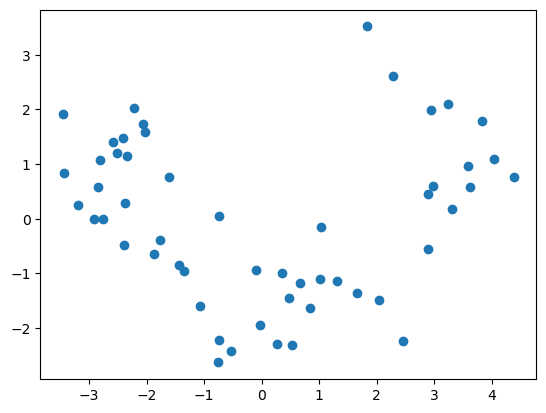

In [80]:
plt.scatter(train_pca_sc[:,0],train_pca_sc[:,1])

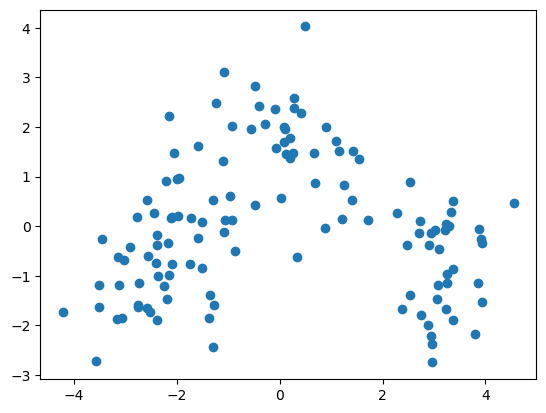

In [81]:
plt.scatter(test_pca_sc[:,0],test_pca_sc[:,1])

# k means clustering algorithm implementation

In [96]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [111]:
wcss=[]
for k in range(1,5):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(train_pca_sc)
    wcss.append(kmeans.inertia_)

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [112]:
wcss

[529.5316463410804, 305.0551847246215, 190.1358343287732, 164.98395432490457]

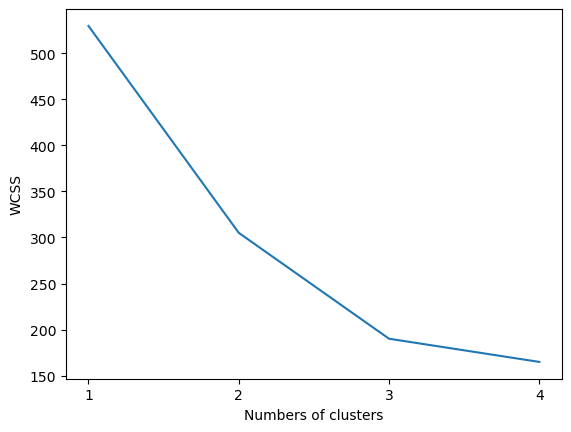

In [117]:
## plot elbow curve
plt.plot(range(1,5),wcss)
plt.xticks(range(1,5))
plt.xlabel("Numbers of clusters")
plt.ylabel("WCSS")
plt.show()

In [118]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [119]:
x_labels=kmeans.fit_predict(train_pca_sc)

In [120]:
x_labels

array([0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2,
       2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0,
       1, 1, 1, 2, 2, 2, 0, 2, 0])

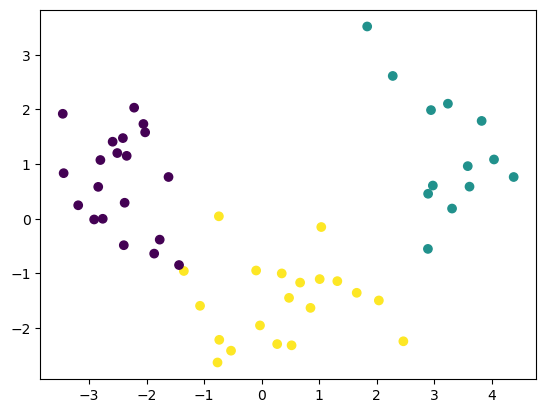

In [121]:
plt.scatter(train_pca_sc[:,0],train_pca_sc[:,1],c=x_labels)

In [122]:
x_test_labels=kmeans.predict(test_pca_sc)

In [123]:
x_test_labels

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0,
       0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1,
       1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0])

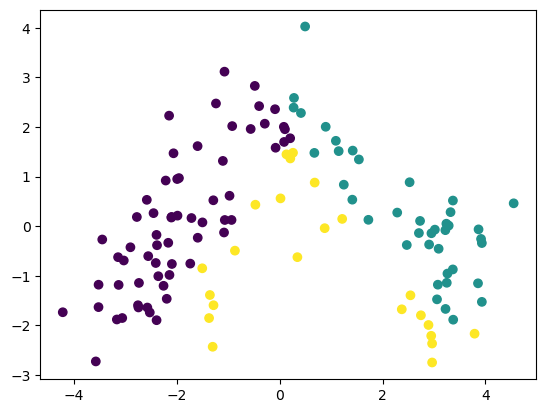

In [124]:
plt.scatter(test_pca_sc[:,0],test_pca_sc[:,1],c=x_test_labels)

In [ ]:
we find scattered cluster so that dataset is noisy and scattered points.